# Introduction to Image Processing
This notebook walks through The prcoccess of implementing the algorithms seen in a series of lectures on image processing.

### Importing libraries and Packages

In [1]:
from matplotlib.pyplot import *

import numpy as np

In [132]:
IMAGE_DIR = "../data/imgs/lenna.jpg"

In [131]:
image = imread (IMAGE_DIR)

def plot_1 (image) :
    imshow (image, cmap = "gray")

def plot_2 (image_1, image_2, desc_1="Before", desc_2="After") :
    fig = figure(figsize=(18,8))

    ax = fig.add_subplot(1, 2, 1)
    ax.set_title(desc_1)
    plot_1 (image_1)

    ax = fig.add_subplot(1, 2, 2)
    ax.set_title(desc_2)
    plot_1 (image_2)

In [3]:
def neumann_bc (I, border_size = 1) :
    a, b = np.shape (I)
    
    d = border_size
    
    A = a + 2 * border_size
    B = b + 2 * border_size
    
    new_I = np.zeros ((A,B))
    
    new_I [d:(A-d) , d:(B-d)] = I
    
    for i in range (d,A-d) :
        for j in range (0,d) :
            new_I [i,j] = new_I [i, 2 * d - j]
            
        for j in range (0,d) :
            new_I [i,j+B-d] = new_I [i, B-d-1 - j]
    
    for j in range (0,B) :
        for i in range (0,d) :
            new_I [i,j] = new_I [2 * d - i, j]
            
        for i in range (0,d) :
            new_I [i+B-d,j] = new_I [B-d-1 - i, j]

    return new_I

In [4]:
def gaussian_noise (I, noise = 5) :
    
    return I + noise * np.random.normal (0,1, np.shape (I))

In [20]:
def compute_1 (I) :
    a, b = np.shape (I)

    I = neumann_bc (I, d:=1)
    A, B = np.shape (I)
    
    I_x = np.zeros ((a,b))
    I_y = np.zeros ((a,b))
    for i in range (d, A-d) :
        for j in range (d, B-d) :
            I_x [i-d,j-d] = (I[i+1,j] - I[i-1,j])  / 2
            I_y [i-d,j-d] = (I[i,j+1] - I[i,j-1])  / 2
            
    return I_x, I_y

def compute_2 (I) :
    a, b = np.shape (I)

    I = neumann_bc (I, d:=1)
    A, B = np.shape (I)
    
    I_xx = np.zeros ((a,b))
    I_xy = np.zeros ((a,b))
    I_yy = np.zeros ((a,b))
    for i in range (d, A-d) :
        for j in range (d, B-d) :
            I_xx [i-d,j-d] = (I[i+1,j] - 2 * I[i,j] + I[i,j-1])
            I_yy [i-d,j-d] = (I[i,j+1] - 2 * I[i,j] + I[i,j-1])

            I_xy [i-d,j-d] = (I[i+1,j+1] - I[i+1,j-1] - I[i-1,j+1] + I[i-1,j-1]) / 4
            
    return I_xx, I_yy, I_xy

In [110]:
def heat_eq (I, dt = .25, N = 100, noise = 15) :
    I0 = gaussian_noise (I, noise)
    
    J = I0
    for i in range (N) :
        J_xx, J_yy, J_xy = compute_2 (J)

        laplacien = J_xx + J_yy
        J += laplacien * dt
    return J

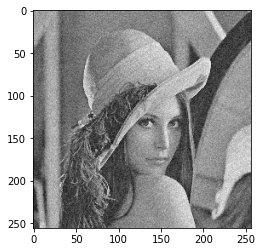

In [111]:
image_blurry = heat_eq (image)

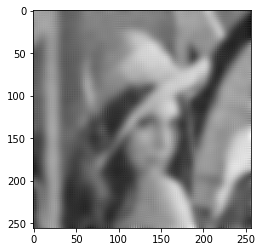

In [118]:
plot_1 (image_blurry)

In [114]:
def perona_malik_eq (I, dt = .25, N = 100, noise = 35, alpha = 40) :
    I0 = gaussian_noise (I, noise)
    
    J = I0    
    for i in range (N) :
        norm = np.sqrt (sum (compute_1(J)[0] ** 2, compute_1(J)[1] ** 2))

        c1 = 1 / np.sqrt (1 + (norm / alpha)**2)

        px_x = compute_1 (c1 * compute_1(J) [0]) [0]
        py_y = compute_1 (c1 * compute_1(J) [1]) [1]

        divgrad = px_x + py_y

        J += divgrad * dt
    return J

In [115]:
image_blurry = perona_malik_eq (image)

array([[-30.36380088,   9.6954761 , -17.98384583, ...,  -1.04788573,
         -9.96765582,   3.88038423],
       [ 12.03728616,   1.93073559,   7.63621547, ...,  43.29881257,
         31.30252116,  52.21640235],
       [-11.53604356,   6.85585509,  -6.08646765, ...,  16.55008181,
          9.58357948,  22.10240709],
       ...,
       [-34.34345295, -23.35228238, -43.05609976, ...,  13.06995342,
          6.39146196,   9.93286673],
       [-26.4110913 , -25.46734317, -37.90011544, ...,  18.87972432,
         11.06340767,  21.39096319],
       [-51.09943014, -15.84411865, -53.95267183, ...,   3.54192562,
         -4.96615161,  -0.86791253]])

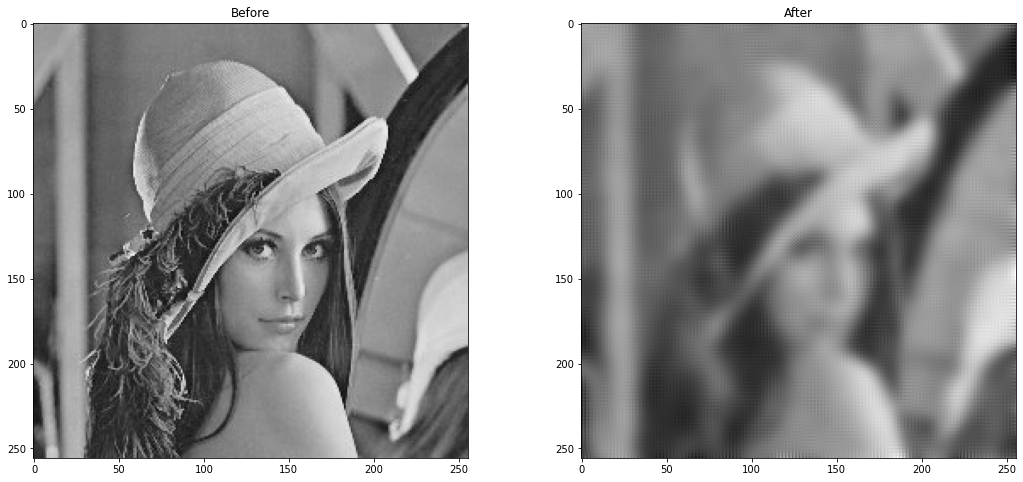

In [116]:
plot_2 (image, image_blurry)